## 小提琴图

小提琴图用于显示数据分布及概率密度，结合了箱型图和核密度估计图，它包括了`boxplot`中的中位数和四分位数，两侧添加旋转后的`kde`曲线，中间的黑色粗线表示四分位数范围，白点为中位数 (一个简化后的箱线图)，从其延申的细黑线表示`95%`的置信区间

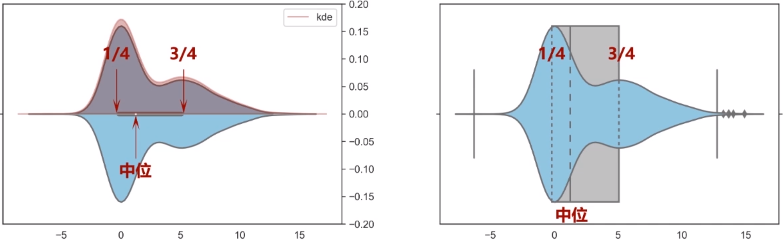

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style('white')

In [3]:
x = np.random.normal(0, 1, 1000)
x2 = np.random.normal(5, 2, 1000)
X = np.append(x, x2)
y = np.append(np.random.normal(0, 1, 900), np.random.uniform(4, 5, 100))
df = pd.DataFrame({'x': np.append(x, y), 'dataset': np.append(['x']*1000, ['y']*1000)})
df

,x,dataset
0,-1.070355,x
1,-0.828306,x
2,0.292441,x
3,0.240534,x
4,-0.332507,x
...,...,...
1995,4.680661,y
1996,4.799277,y
1997,4.274113,y
1998,4.170516,y


在相同的`x`轴上绘制`kde`和小提琴图  
将`kde`的`y`轴范围设置成一个对称的区间，使其`x`轴在图的中央

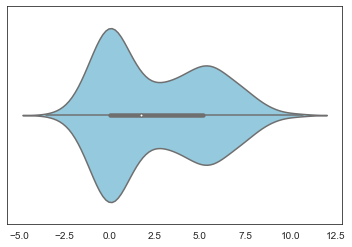

In [7]:
ax = plt.gca()
sns.violinplot(X, color='skyblue')

(-0.2, 0.2)

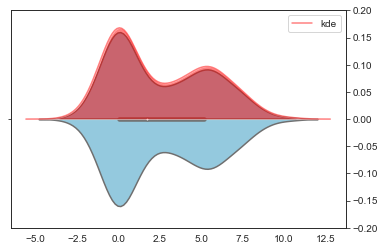

In [9]:
ax = plt.gca()
sns.violinplot(X, color='skyblue')

ax2 = ax.twinx()
sns.kdeplot(X, color='red', shade=True, label='kde', alpha=0.5)
plt.ylim(-0.2, 0.2)

## 小提琴图与箱线图的比较

> 小提琴图包括了`boxplot`的主要信息，可以更好的展示多峰分布的图形，但是不能显示异常值

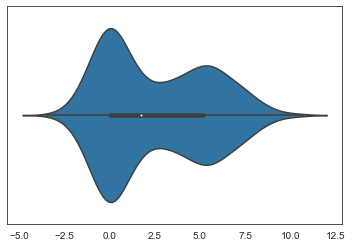

In [10]:
sns.violinplot(X)

通过减小`带宽`以增大数据在`kde`曲线的比重的方法来进行拟合，异常值所在均匀分布的区间就较为明显了，代价是损失`kde`的光滑度

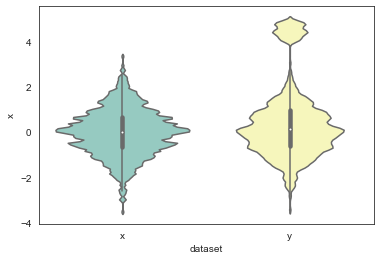

In [11]:
sns.violinplot(x='dataset', y='x', data=df, bw=0.05, palette='Set3')

对于单峰分布而言，有时`box`更加直观

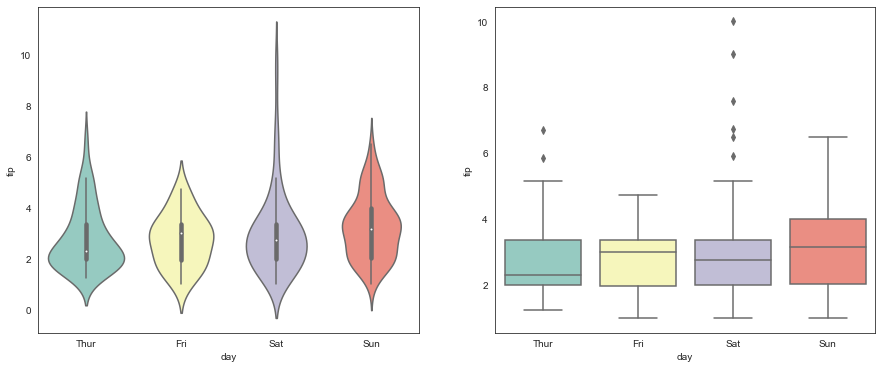

In [14]:
tips = sns.load_dataset('tips')

plt.figure(figsize=(15, 6))
plt.subplot(121)
sns.violinplot(x='day', y='tip', data=tips, palette='Set3')
plt.subplot(122)
sns.boxplot(x='day', y='tip', data=tips, palette='Set3')

```python
violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
               bw="scott", cut=2, scale="area", scale_hue=True, gridsize=100,
               width=.8, inner="box", split=False, dodge=True, orient=None,
               linewidth=None, color=None, palette=None, saturation=.75,
               ax=None, **kwargs):
```

参数`scale`: 用于缩放每个小提琴宽度
+ 值为`area`，每把小提琴都有相同的面积
+ 值为`count`，小提琴的宽度将按该箱中的观察次数进行缩放
+ 值为`width`，每把小提琴都有相同的宽度

参数`split`: 当有两个类别时，每个类别绘制一半小提琴
+ 设置`split`为True，更容易直接比较分布

参数`inner`: 内部信息显示 
可选值：{"box", "quartile", "point", "stick", None}，默认为`box`
表示小提琴内部的数据点。

+ `box`: 绘制一个微型箱图
+ `quartiles`：绘制分布的四分位数
+ `point` / `stick`：显示每个基础数据点
+ `None`：只有`kde`

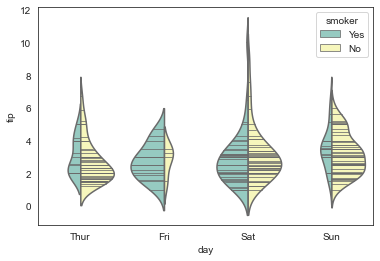

In [15]:
sns.violinplot(x='day', y='tip', data=tips, hue='smoker', palette='Set3', split=True, scale='count', inner='stick')